# SVM Lineal


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn import svm

In [ ]:
X = [1, 5, 1.5, 8, 1 , 9 ]
Y = [2, 8, 1.8, 8 , 0.6, 11]

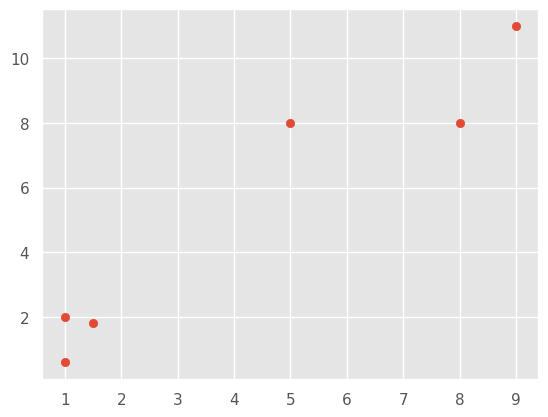

In [ ]:
plt.scatter(X, Y)
plt.show()

In [ ]:
data = np.array(list(zip(X, Y)))
data

array([[ 1. ,  2. ],
       [ 5. ,  8. ],
       [ 1.5,  1.8],
       [ 8. ,  8. ],
       [ 1. ,  0.6],
       [ 9. , 11. ]])

In [ ]:
target = [0,1,0,1,0,1]

In [ ]:
clasifier = svm.SVC(kernel='linear', C=1.0)
clasifier.fit(data, target)

SVC(kernel='linear')

In [ ]:
clasifier.predict([[0.58, 0.76]])

array([0])

In [ ]:
w = clasifier.coef_[0]
w

array([0.1380943 , 0.24462418])

In [ ]:
a = -w[0] / w[1]
a

-0.564516129032258

In [ ]:
b = -clasifier.intercept_[0] / w[1]
b

6.734677437813051

In [ ]:
xx = np.linspace(0, 12)
yy = a * xx + b

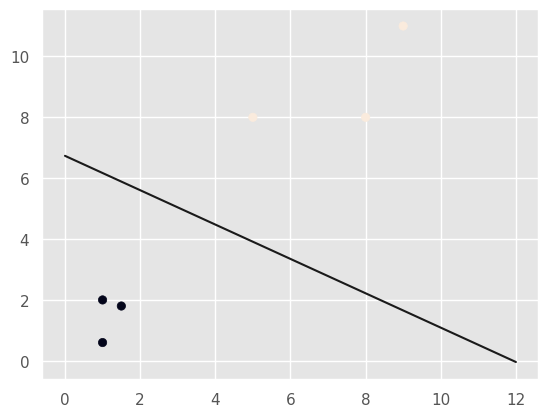

In [ ]:
plt.plot(xx, yy, 'k-')
plt.scatter(X, Y, c=target)
plt.axis('tight')
plt.show()

In [ ]:
from scipy import stats
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_regression
from sklearn.datasets import make_classification, make_regression
from sklearn.datasets import make_blobs



In [ ]:
X , Y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6)

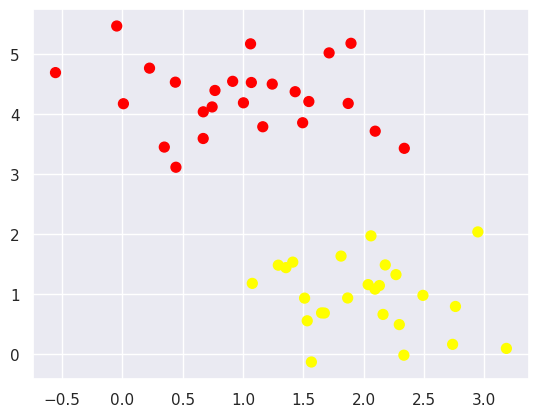

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='autumn')

In [ ]:
xx  = np.linspace(-1, 3.5)
yy = a * xx + b

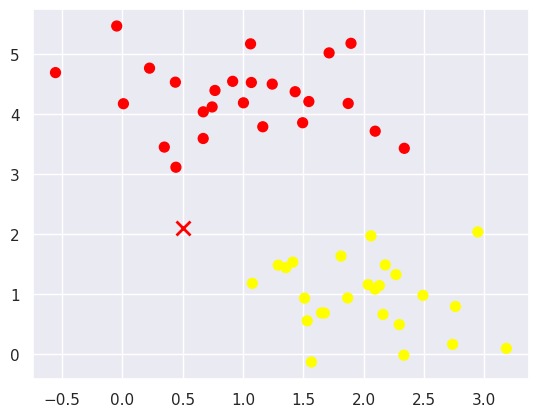

In [ ]:
plt.plot([0.5], [2.1], "x", color="red", markeredgewidth=2, markersize=10)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='autumn')

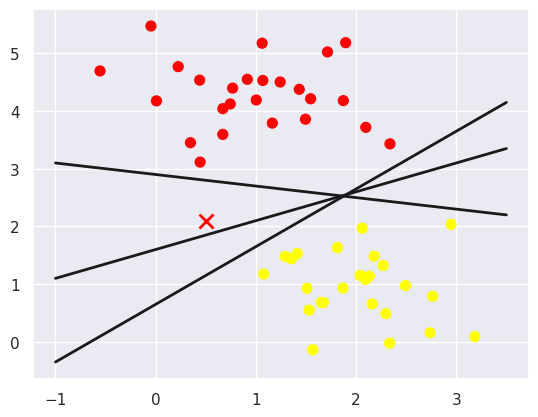

In [ ]:
plt.plot([0.5], [2.1], "x", color="red", markeredgewidth=2, markersize=10)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='autumn')
for a, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    yy = a * xx + b
    plt.plot(xx, yy, 'k-', linewidth=2)

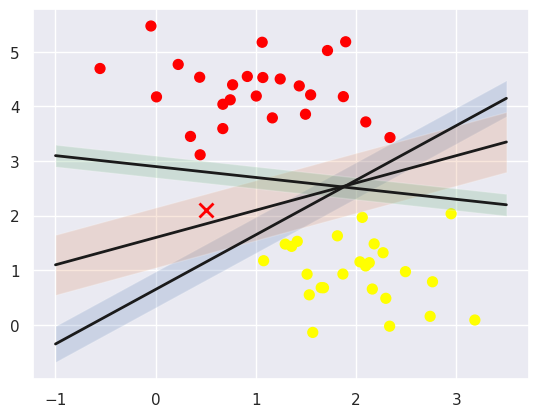

In [ ]:
plt.plot([0.5], [2.1], "x", color="red", markeredgewidth=2, markersize=10)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='autumn')
for a, b ,d in [(1, 0.65, 0.33 ), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yy = a * xx + b
    plt.plot(xx, yy, 'k-', linewidth=2)
    plt.fill_between(xx, yy - d, yy + d, alpha=0.2)

In [ ]:
from sklearn.svm import SVC


In [ ]:
model = SVC(kernel='linear', C = 1E10)
model.fit(X, Y)

SVC(C=10000000000.0, kernel='linear')

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    p = model.decision_function(xy).reshape(XX.shape)
    ax.contour(XX, YY, p, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, linewidth=1, facecolors='black')

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

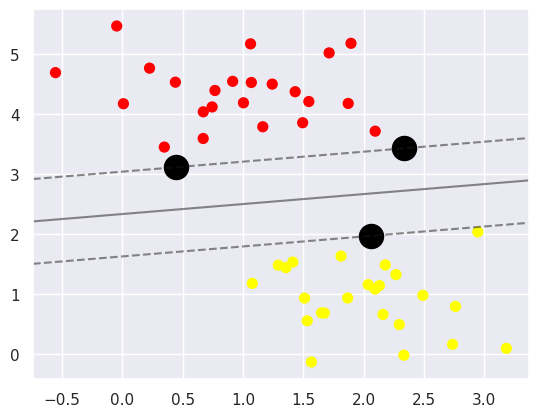

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='autumn')
plot_svc_decision_function(model)

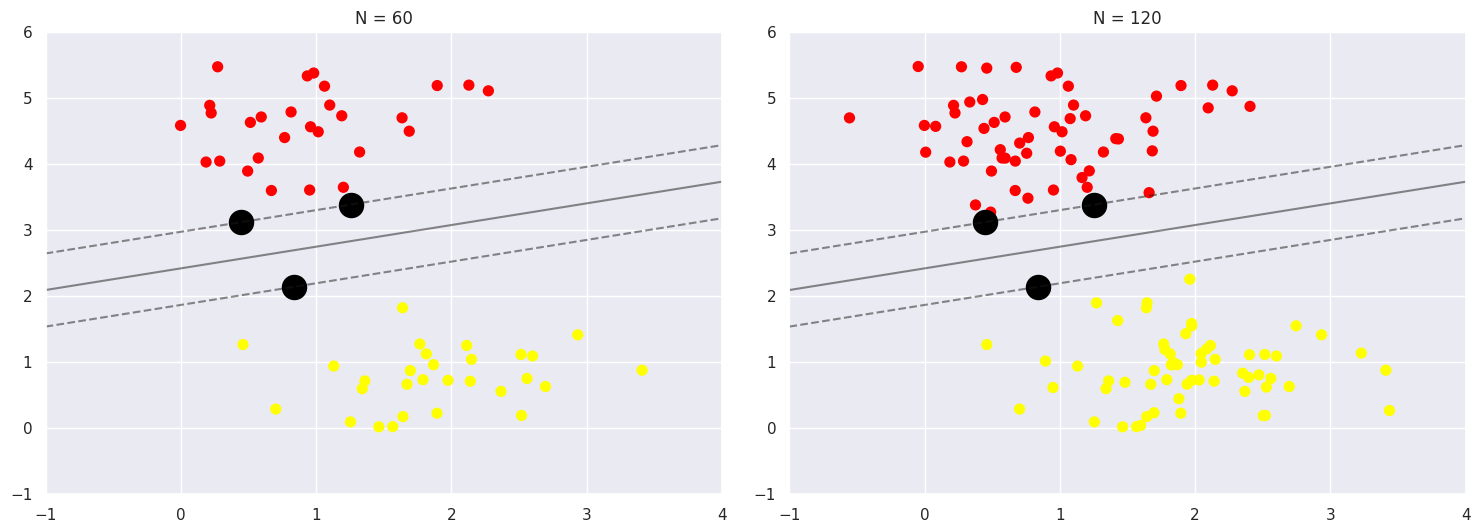

In [ ]:
def plot_svm(N=10, ax=None):
    X, Y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.6)

    X = X[:N]
    Y = Y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, Y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

<function __main__.plot_svm(N=10, ax=None)>

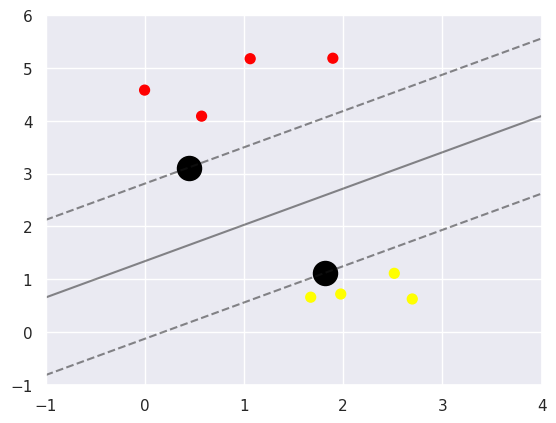

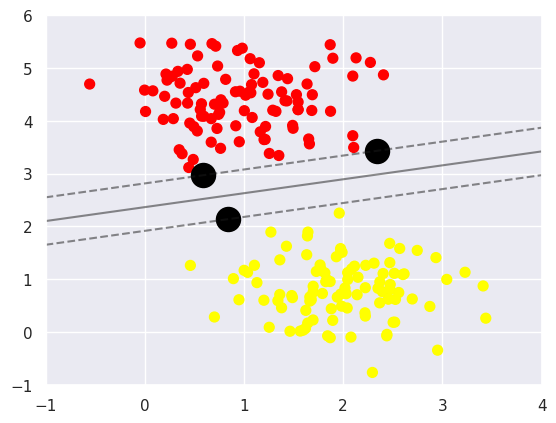

In [ ]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None))

# Indicar fronteras no lineales


In [ ]:
from sklearn.datasets import make_circles

# Generate synthetic data
X, y = make_circles(n_samples=100, factor=0.5, noise=0.05)


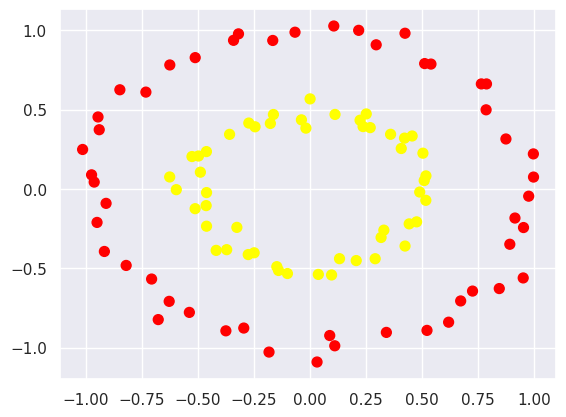

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')


In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    p = model.decision_function(xy).reshape(XX.shape)
    ax.contour(XX, YY, p, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, linewidth=1, facecolors='blue')

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='linear').fit(X, y)

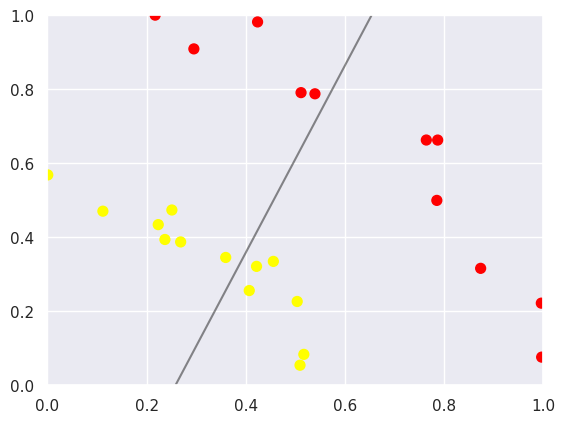

In [ ]:
plot_svc_decision_function(SVC(kernel='linear').fit(X, y), plot_support=False)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

In [ ]:
from mpl_toolkits import mplot3d

In [ ]:
def plot_3D(X, Y , r, elev=30, azim=30):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interactive(children=(Dropdown(description='r', options=(0.3441770270681701, 0.08898264940033862, -0.439733612…

<function __main__.plot_3D(X, Y, r, elev=30, azim=30)>

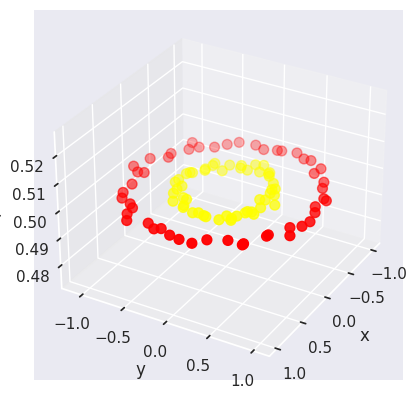

In [ ]:
interact(plot_3D, X=fixed(X), Y=fixed(y), r=X[:, 1])

In [ ]:
rbf = SVC(kernel='rbf', C=1E6)
rbf.fit(X, y)

SVC(C=1000000.0)

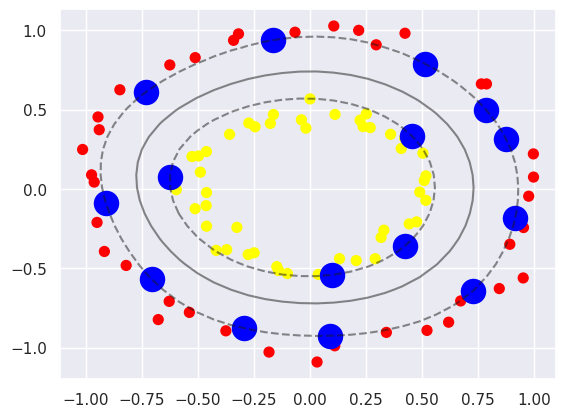

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(rbf)

# Ajustar parametros de SVM

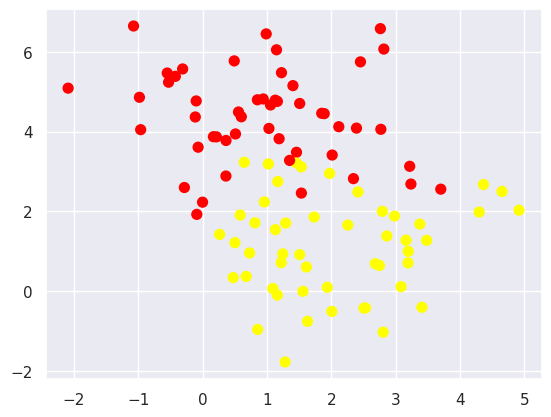

In [ ]:
X, Y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='autumn')

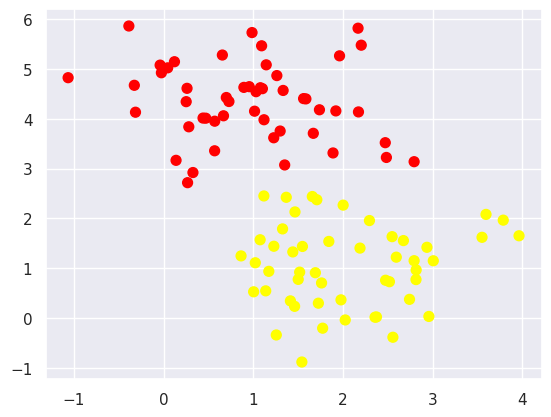

In [ ]:
X , Y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='autumn')

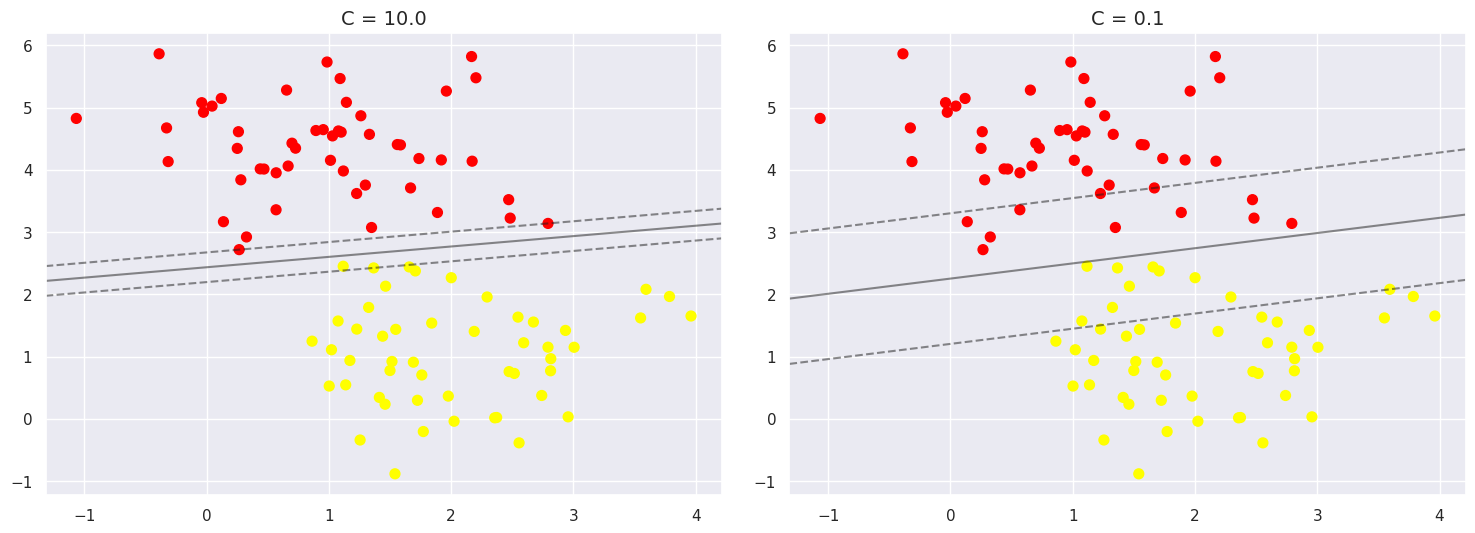

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, Y)
    axi.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi, plot_support=False)
    axi.set_title('C = {0:.1f}'.format(C), size=14)

# Face recognition

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)


In [ ]:
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [ ]:
import matplotlib.pyplot as plt

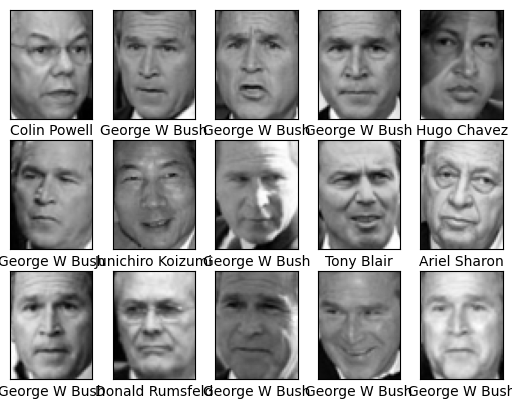

In [ ]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
  axi.imshow(faces.images[i], cmap='gray')
  axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])


In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [ ]:
pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(faces.data, faces.target, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50], 'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}

In [ ]:
grid = GridSearchCV(model, param_grid)

In [ ]:
grid.fit(Xtrain, Ytrain)
print(grid.best_params_)

{'svc__C': 5, 'svc__gamma': 0.001}


In [ ]:
clasifier = grid.best_estimator_
yfit = clasifier.predict(Xtest)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

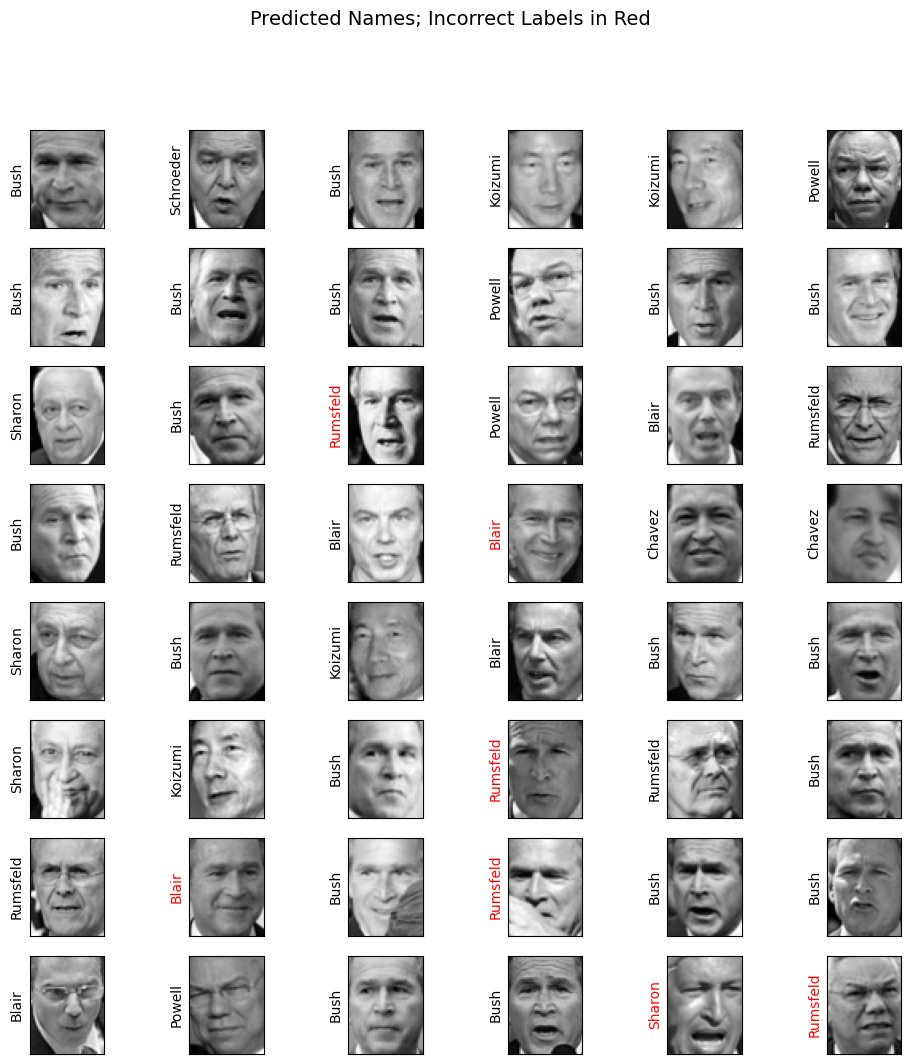

In [ ]:
fig, ax  = plt.subplots(8, 6, figsize=(12, 12))
for i, axi in enumerate(ax.flat):
  axi.imshow(Xtest[i].reshape(62, 47), cmap='gray')
  axi.set(xticks=[], yticks=[])
  axi.set_ylabel(faces.target_names[yfit[i]].split()[-1], color='black' if yfit[i] == Ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Ytest, yfit, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(Ytest, yfit)
mat

array([[ 13,   0,   2,   0,   0,   0,   0,   0],
       [  1,  60,   3,   2,   0,   0,   0,   2],
       [  1,   2,  26,   0,   0,   0,   0,   2],
       [  2,  10,   5, 101,   4,   1,   1,   2],
       [  0,   0,   1,   0,  19,   0,   1,   2],
       [  2,   0,   0,   1,   2,  14,   0,   1],
       [  0,   0,   0,   0,   0,   0,  12,   0],
       [  1,   0,   0,   0,   0,   0,   0,  41]])

Text(113.92222222222219, 0.5, 'predicted label')

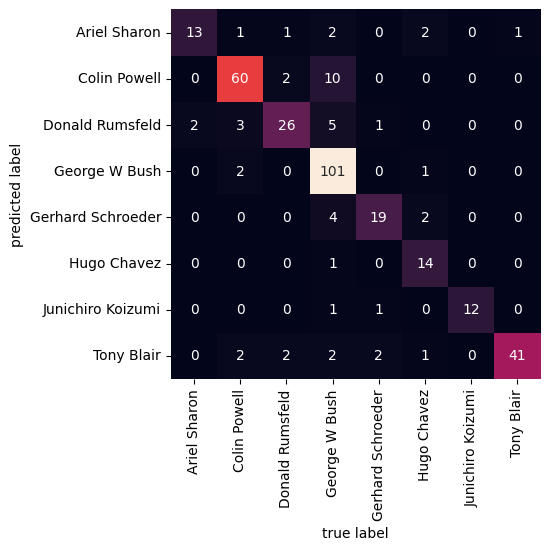

In [ ]:
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=faces.target_names, yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

# SVM Regresión vs clasificación

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn import svm, datasets


In [ ]:
df = datasets.load_iris()
df


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
X = df.data[:, :2]
Y = df.target

In [ ]:
X_min , X_max = X[:, 0].min() - 1, X[:, 0].max() + 1
Y_min , Y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

In [ ]:
h = (X_max / X_min) / 100
xx, yy = np.meshgrid(np.arange(X_min, X_max, h), np.arange(Y_min, Y_max, h))
X_plot = np.c_[xx.ravel(), yy.ravel()]

In [ ]:
c = 1.0
svc = svm.SVC(kernel='linear', C=c, decision_function_shape="ovr").fit(X, Y)
Y_pred = svc.predict(X_plot)
Y_pred = Y_pred.reshape(xx.shape)

Text(0, 0.5, 'Sepal width')

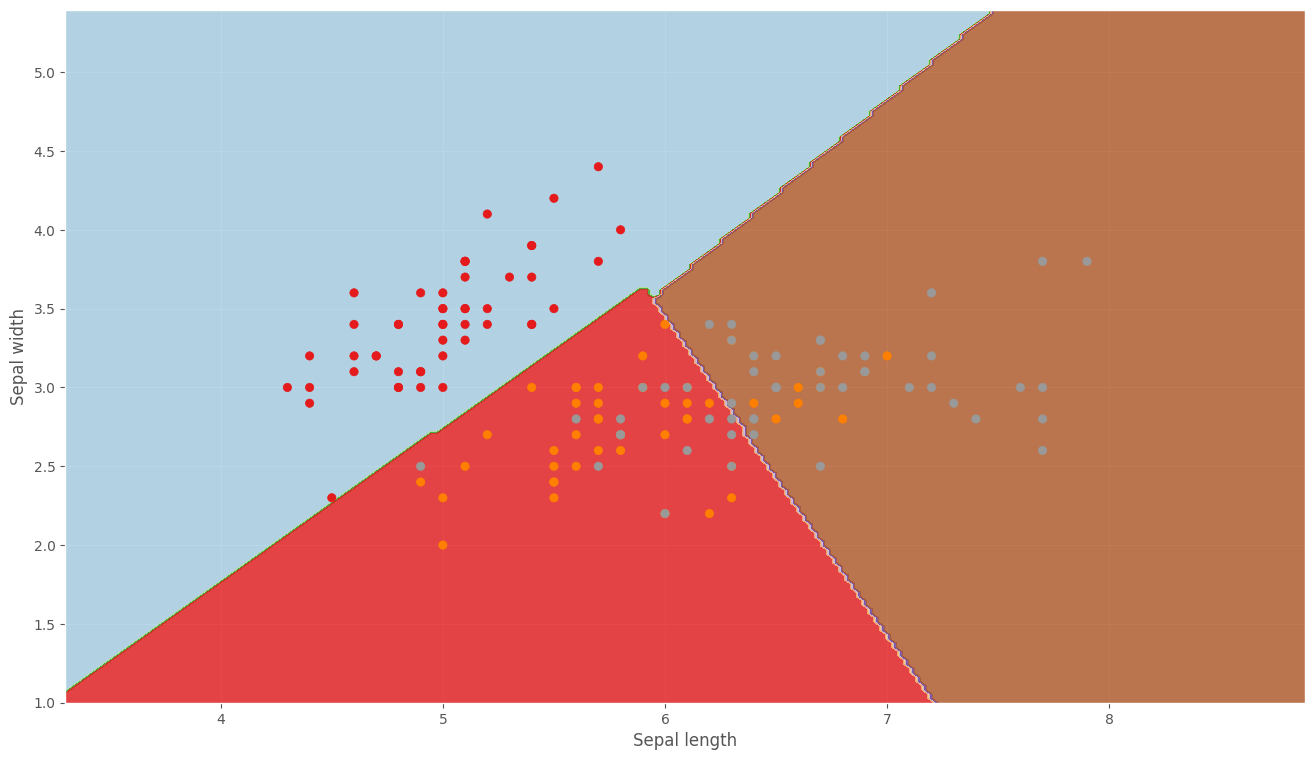

In [ ]:
plt.figure(figsize=(16, 9))
plt.contourf(xx, yy, Y_pred, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

In [ ]:
c = 1.0
svc = svm.SVC(kernel='rbf', C=c, decision_function_shape="ovr").fit(X, Y)
Y_pred = svc.predict(X_plot)
Y_pred = Y_pred.reshape(xx.shape)

Text(0, 0.5, 'Sepal width')

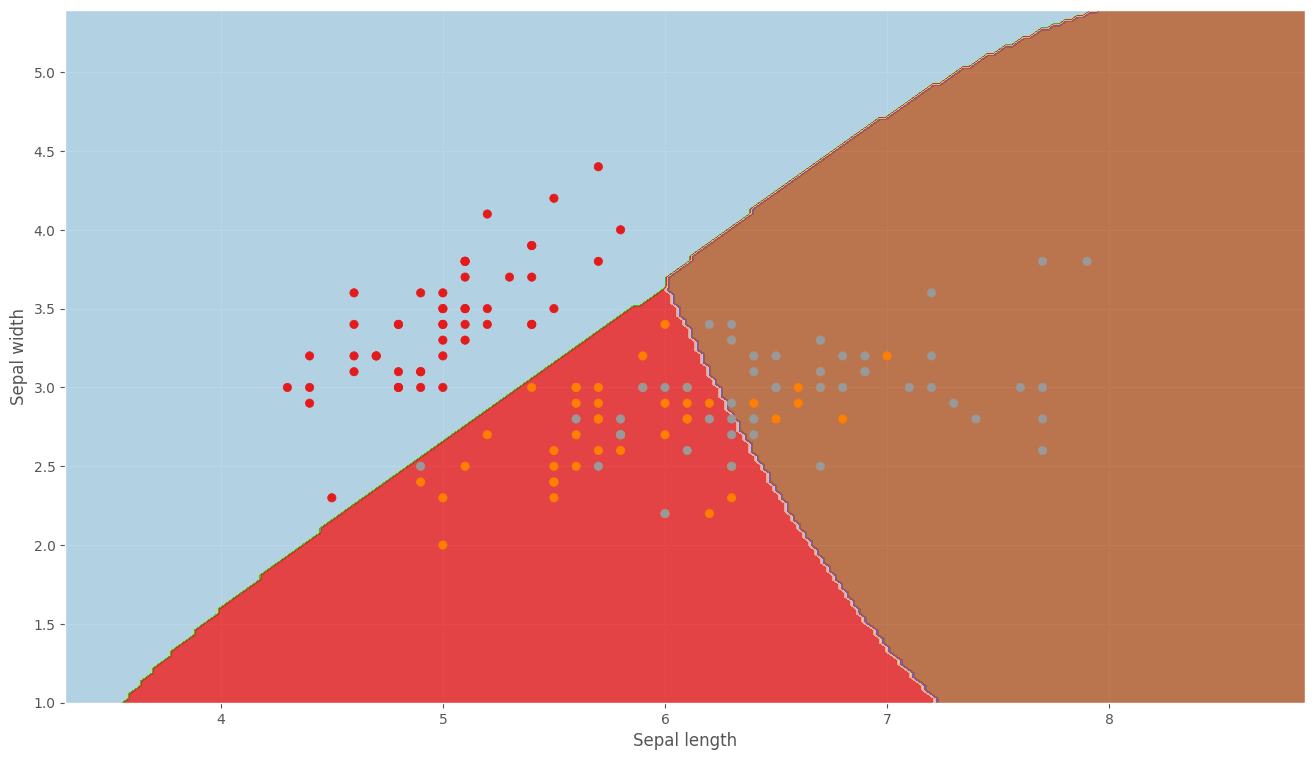

In [ ]:
plt.figure(figsize=(16, 9))
plt.contourf(xx, yy, Y_pred, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

In [ ]:
c = 100000.0
svc = svm.SVC(kernel='poly', C=c, decision_function_shape="ovr").fit(X, Y)
Y_pred = svc.predict(X_plot)
Y_pred = Y_pred.reshape(xx.shape)

Text(0, 0.5, 'Sepal width')

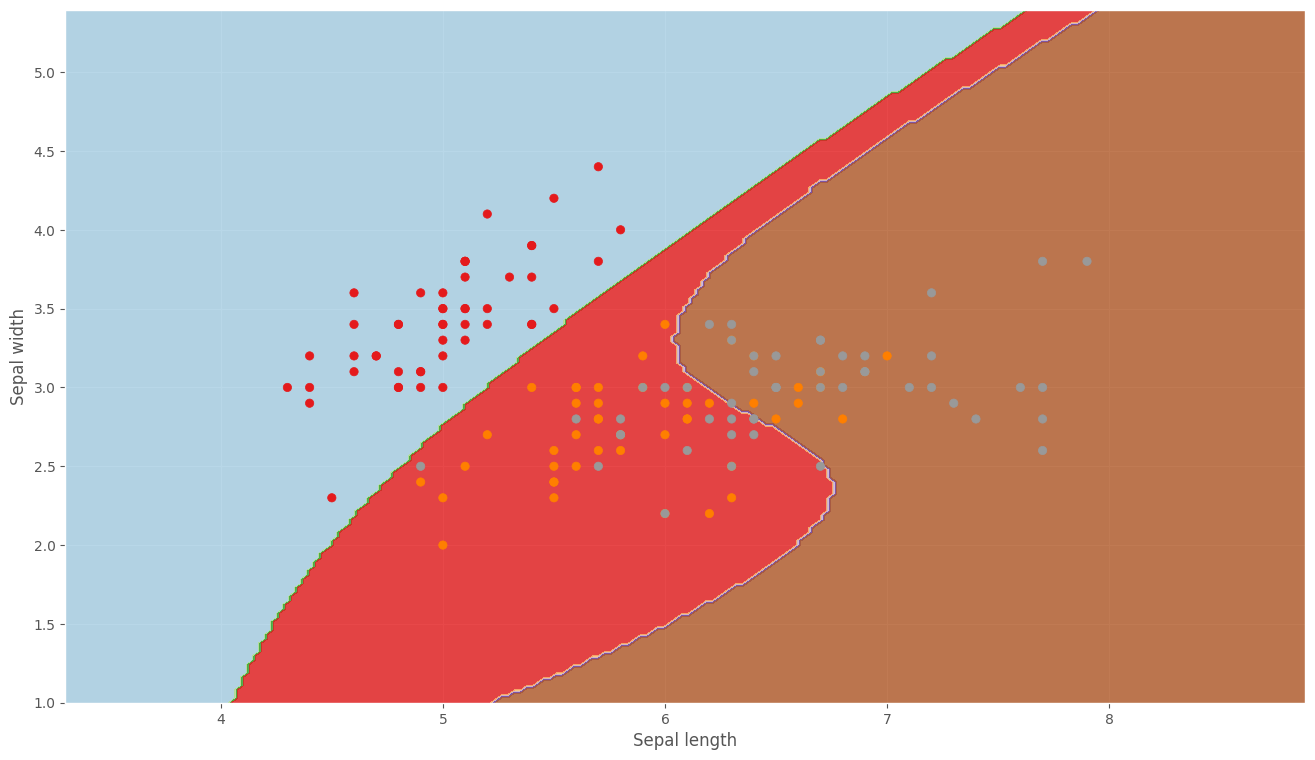

In [ ]:
plt.figure(figsize=(16, 9))
plt.contourf(xx, yy, Y_pred, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.utils import shuffle

In [ ]:
X, Y = shuffle(X, Y, random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [ ]:
parametros = [
    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
    {'kernel': ['rbf'], 'gamma': [0.001, 0.0001], 'C': [1,10,100,1000]}
]

In [ ]:
clf = GridSearchCV(svm.SVC(decision_function_shape='ovr'), parametros, cv=5)
clf.fit(X, Y)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

In [ ]:
clf.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [ ]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']

In [ ]:
means

array([0.77333333, 0.76666667, 0.76666667, 0.76666667, 0.74666667,
       0.74666667, 0.74666667, 0.74666667, 0.81333333, 0.74666667,
       0.76      , 0.81333333])

In [ ]:
stds

array([0.04898979, 0.04714045, 0.04714045, 0.04714045, 0.06182412,
       0.06182412, 0.06182412, 0.06182412, 0.06182412, 0.06182412,
       0.05333333, 0.06182412])

In [ ]:
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
  print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.773 (+/-0.098) for {'C': 1, 'kernel': 'linear'}
0.767 (+/-0.094) for {'C': 10, 'kernel': 'linear'}
0.767 (+/-0.094) for {'C': 100, 'kernel': 'linear'}
0.767 (+/-0.094) for {'C': 1000, 'kernel': 'linear'}
0.747 (+/-0.124) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.747 (+/-0.124) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.747 (+/-0.124) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.747 (+/-0.124) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.813 (+/-0.124) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.747 (+/-0.124) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.760 (+/-0.107) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.813 (+/-0.124) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}


In [ ]:
Y_pred = clf.predict(X_test)

In [ ]:
print(classification_report(Y_test, Y_pred, target_names=df.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.60      0.82      0.69        11
   virginica       0.83      0.62      0.71        16

    accuracy                           0.79        38
   macro avg       0.81      0.81      0.80        38
weighted avg       0.81      0.79      0.79        38



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from ipywidgets import interact, FloatSlider, Dropdown

def svm_iris_interactive(C=1.0, gamma=0.7, kernel='linear'):
    # Cargar el conjunto de datos Iris
    iris = datasets.load_iris()
    X = iris.data[:, :2]  # Usamos solo las dos primeras características para facilitar la visualización
    Y = iris.target

    # Configuración del espacio de visualización
    X_min, X_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    Y_min, Y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.02  # Tamaño de los pasos en la malla
    xx, yy = np.meshgrid(np.arange(X_min, X_max, h), np.arange(Y_min, Y_max, h))

    # Entrenar el modelo SVM
    svc = svm.SVC(kernel=kernel, C=C, gamma=gamma, decision_function_shape="ovr").fit(X, Y)

    # Predecir para todos los puntos de la malla
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Visualización
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolor='k', s=20)
    plt.title(f'SVM con kernel={kernel}, C={C}, gamma={gamma}')
    plt.xlabel('Característica 1')
    plt.ylabel('Característica 2')
    plt.show()

# Crear widgets interactivos
interact(
    svm_iris_interactive,
    C=FloatSlider(value=1.0, min=0.01, max=1000, step=0.1, description='C'),
    gamma=FloatSlider(value=0.7, min=0.01, max=10, step=0.1, description='Gamma'),
    kernel=Dropdown(options=['linear', 'rbf', 'poly', 'sigmoid'], value='linear', description='Kernel')
)



interactive(children=(FloatSlider(value=1.0, description='C', max=1000.0, min=0.01), FloatSlider(value=0.7, de…

<function __main__.svm_iris_interactive(C=1.0, gamma=0.7, kernel='linear')>

# SVM para regresión

In [2]:
import numpy as np
X = np.sort(5 * np.random.rand(200, 1), axis=0)
Y = np.sin(X).ravel()
Y[::5] += 3 * (0.5 - np.random.rand(40))

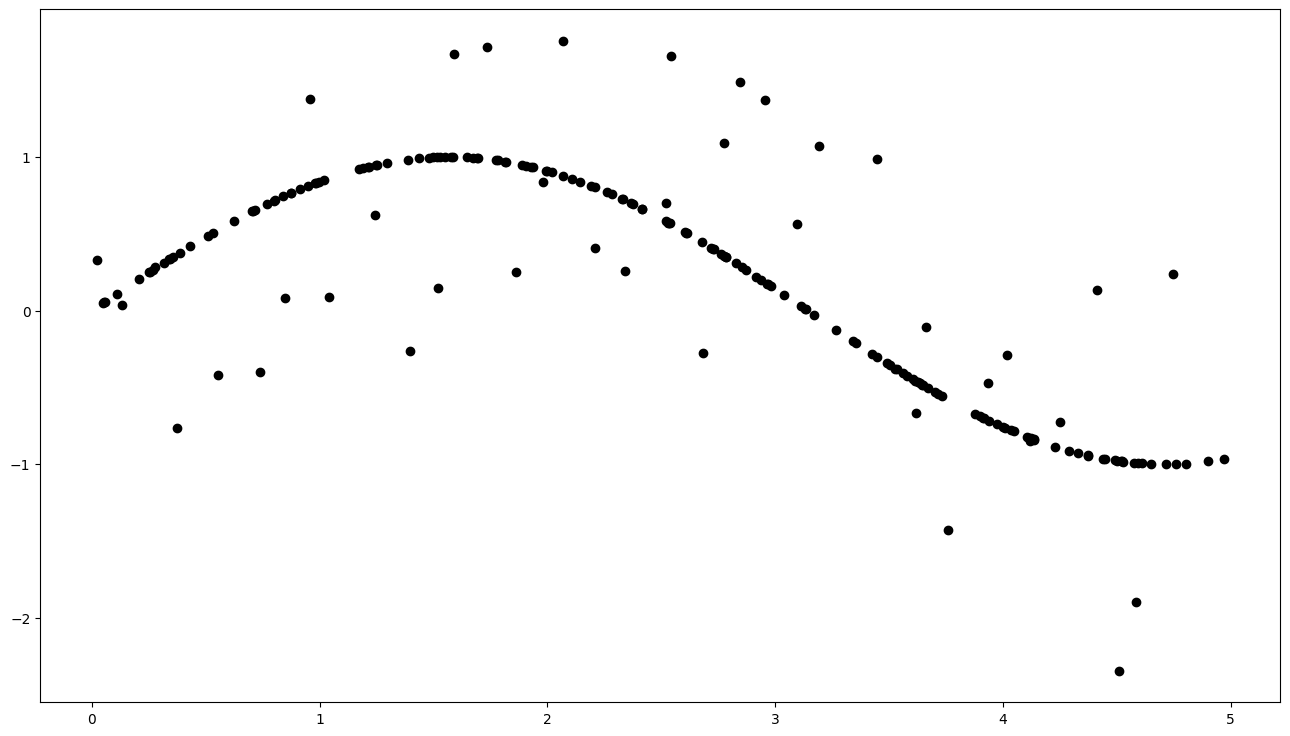

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 9))
plt.scatter(X, Y, c='k', label='data')

In [5]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=0.1, coef0=1)

In [6]:
y_lin = svr_lin.fit(X, Y).predict(X)
y_rbf = svr_rbf.fit(X, Y).predict(X)
y_poly = svr_poly.fit(X, Y).predict(X)

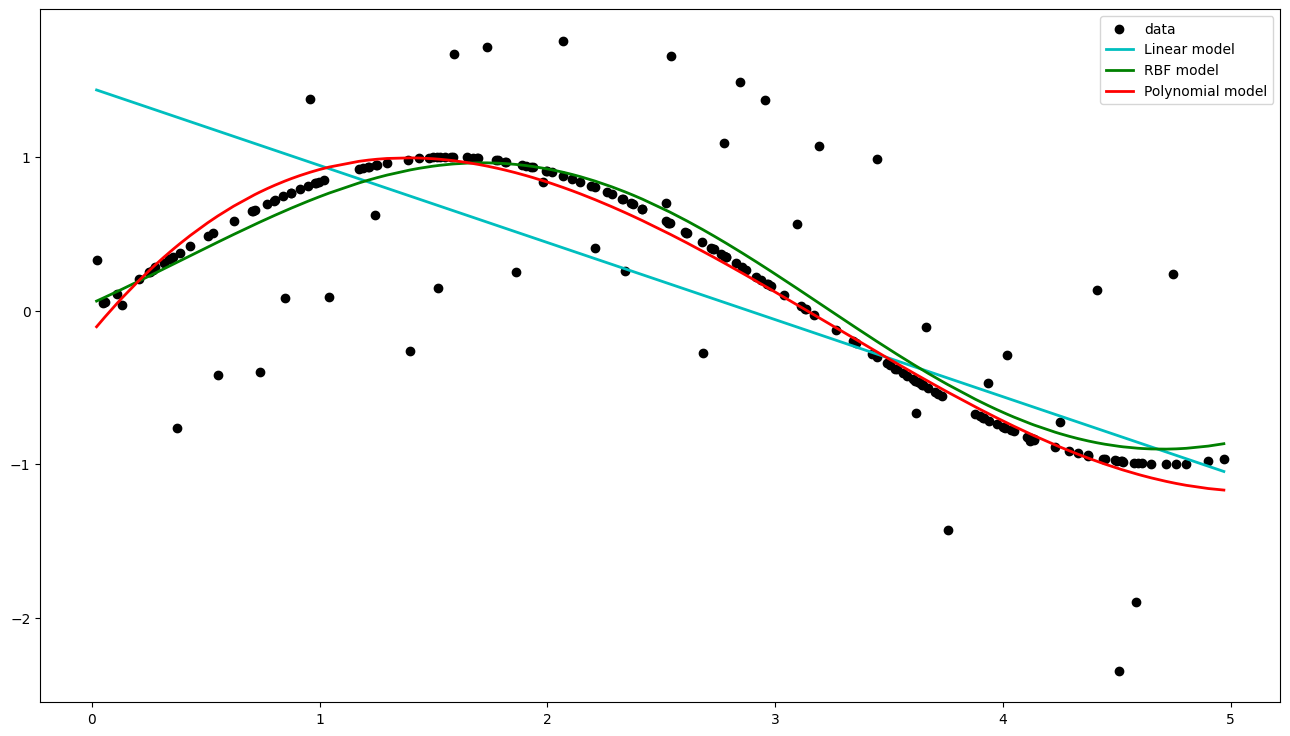

In [8]:
plt.figure(figsize=(16, 9))
lw = 2
plt.scatter(X, Y, c='k', label='data')
plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(X, y_rbf, color='g', lw=lw, label='RBF model')
plt.plot(X, y_poly, color='r', lw=lw, label='Polynomial model')
plt.legend()